## Техническое задание

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
data = pd.read_excel("data.xlsx")
data = data.drop(columns = ['Unnamed: 5'])
data

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [ ]:
#Устанавливаем месяц для каждой записи в таблице
data['month'] = '-'

months_list = ['Май 2021','Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021']

months_range = list()

for month in months_list:
    months_range.append(data[data['status']==month].index[0])
    
months_range.append(len(data))

for index in range(len(months_range)-1):
    data.loc[months_range[index]+1:months_range[index+1],'month'] = months_list[index]
    
#Удаляем ненужные строки
data = data.drop(index = months_range[:-1])

data

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


## Вопросы

#### 1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен

In [ ]:
#Получаем данные за июль
data_july = data[data['month']=='Июль 2021'].reindex()
data_july

,client_id,sum,status,sale,new/current,document,receiving_date,month
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00,Июль 2021
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00,Июль 2021
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN,Июль 2021
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17 00:00:00,Июль 2021
263,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19 00:00:00,Июль 2021
...,...,...,...,...,...,...,...,...
364,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03 00:00:00,Июль 2021
365,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13 00:00:00,Июль 2021
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Июль 2021
367,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11 00:00:00,Июль 2021


In [ ]:
data_july[data_july.status != 'ПРОСРОЧЕНО']['sum'].sum()

859896.4699999997

##### Выручка компании за июль 2021 по сделкам, у которых не просрочен приходенежных средств: 859896.47 

#### 2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Суммарную выручку компании
gain = []
current_gain = 0
for current_sum in data_july['sum']:
    current_gain += current_sum
    gain.append(current_gain)

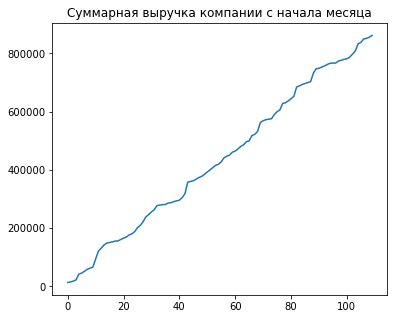

In [ ]:
#Строим график суммарной выручки
fig, ax = plt.subplots()
ax.plot(range(len(data_july)), gain)
ax.set_title('Суммарная выручка компании с начала месяца')
fig.set_figheight(5)
fig.set_figwidth(6)

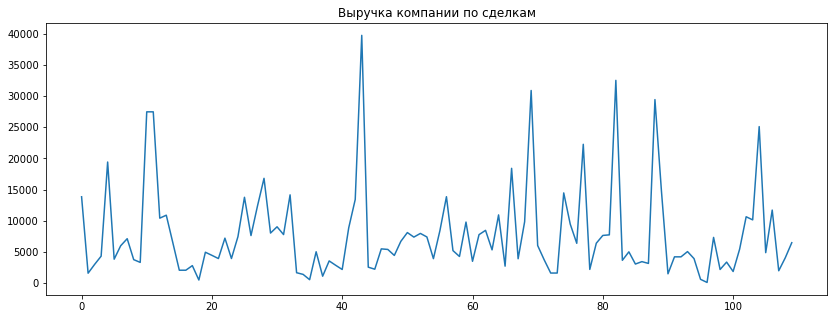

In [ ]:
#Строим график выручки по сделкам
fig, ax = plt.subplots()
ax.plot(range(len(data_july)), data_july['sum'])
ax.set_title('Выручка компании по сделкам')
fig.set_figheight(5)
fig.set_figwidth(14)

#### 3. Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [ ]:
#Получаем данные за сентябрь
data_sept = data[data['month']=='Сентябрь 2021']
data_sept

,client_id,sum,status,sale,new/current,document,receiving_date,month
485,15.0,14288.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08 00:00:00,Сентябрь 2021
486,16.0,1494.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08 00:00:00,Сентябрь 2021
487,21.0,893.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-20 00:00:00,Сентябрь 2021
488,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-10-15 00:00:00,Сентябрь 2021
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaN,Сентябрь 2021
...,...,...,...,...,...,...,...,...
589,304.0,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13 00:00:00,Сентябрь 2021
590,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05 00:00:00,Сентябрь 2021
591,285.0,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05 00:00:00,Сентябрь 2021
592,286.0,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20 00:00:00,Сентябрь 2021


In [ ]:
managers_data = data_sept.groupby('sale').sum()
managers_data.sort_values('sum', ascending = False).iloc[0]

client_id      6164.0
sum          221525.7
Name: Смирнов, dtype: float64

##### Менеджер Смирнов привлек больше всего денежных средств в сентябре 2021

#### 4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [ ]:
#Получаем данные за октябрь
data_oct = data[data['month']=='Октябрь 2021']
data_oct

,client_id,sum,status,sale,new/current,document,receiving_date,month
595,15.0,14591.7,В РАБОТЕ,Иванов,текущая,оригинал,2021-11-11 00:00:00,Октябрь 2021
596,16.0,1291.7,В РАБОТЕ,Иванов,текущая,оригинал,2021-11-11 00:00:00,Октябрь 2021
597,379.0,6063.7,В РАБОТЕ,Иванов,новая,оригинал,2021-11-11 00:00:00,Октябрь 2021
598,24.0,18592.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-12 00:00:00,Октябрь 2021
599,24.0,1453.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-12 00:00:00,Октябрь 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [ ]:
#Группируем данные
data_oct.groupby('new/current').count()['client_id']

new/current
новая      36
текущая    99
Name: client_id, dtype: int64

##### Следовательно, в октябре количество "текущих" сделок преобладало

#### 5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [ ]:
#Получаем данные за май
data_may = data[data['month']=='Май 2021']

#Определяем месяц получения оригинала
data_may['original_receive_month']=pd.to_datetime(data_may['receiving_date'], errors='coerce').dt.month

data_may

<ipython-input-149-c7bdd3d499ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may['original_receive_month']=pd.to_datetime(data_may['receiving_date'], errors='coerce').dt.month


,client_id,sum,status,sale,new/current,document,receiving_date,month,original_receive_month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,7.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,6.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,6.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,7.0
...,...,...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00,Май 2021,7.0
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Май 2021,7.0
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00,Май 2021,7.0
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00,Май 2021,5.0


In [ ]:
#Считаем количество сделок, договора которых получили в июне
data_may[data_may['original_receive_month']==6.0].count()

client_id                 77
sum                       77
status                    77
sale                      77
new/current               77
document                  76
receiving_date            77
month                     77
original_receive_month    77
dtype: int64

##### В июне было получено 77 оригиналов договоров по майским сделкам

## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом: 
  1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).    
  2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и
3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме
«ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).   

  Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по
мере прихода оригиналов.  

  **Вычислите остаток каждого из менеджеров на 01.07.2021**

In [ ]:
#сделки начавшиеся до июля
period_deals = data[(data['month']=='Июнь 2021') | (data['month']=='Май 2021')]
period_deals

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Июнь 2021
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,Июнь 2021
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021


In [ ]:
#сделки, оригиналы которых получены в июле и позже
period_deals['original_receive_month']=pd.to_datetime(period_deals['receiving_date'], errors='coerce').dt.month
later_deals = period_deals[period_deals['original_receive_month']>=7.0]
later_deals

<ipython-input-152-4b21226009a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_deals['original_receive_month']=pd.to_datetime(period_deals['receiving_date'], errors='coerce').dt.month


,client_id,sum,status,sale,new/current,document,receiving_date,month,original_receive_month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,7.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,7.0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,7.0
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13 00:00:00,Май 2021,10.0
12,32.0,7353.9,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00,Май 2021,7.0
...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,7.0
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Июнь 2021,7.0
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,Июнь 2021,9.0
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,7.0


#### Остаток для каждого менеджера на 01.07.2021

In [ ]:
# Считаем остаток для каждого менеджера
manager_remains = dict()
for manager in later_deals['sale'].unique():
    new_deals = later_deals[(later_deals['sale']==manager) & (later_deals['new/current']=='новая') & (later_deals['status']=='ОПЛАЧЕНО')]
    curr_deals = later_deals[(later_deals['sale']==manager) & (later_deals['new/current']=='текущая') & (later_deals['status']!='ПРОСРОЧЕНО')]
    
    remain = new_deals['sum'].sum()*0.07
    remain += curr_deals[curr_deals['sum']>10000]['sum'].sum()*0.05
    remain += curr_deals[curr_deals['sum']<10000]['sum'].sum()*0.03 
    
    manager_remains[manager] = remain
print(pd.DataFrame(manager_remains.items(), columns= ['Manager','Remain']))

      Manager      Remain
0     Петрова  10770.7474
1      Иванов   5991.4520
2   Кузнецова   4496.9501
3  Филимонова   2317.9579
4   Селиванов   5297.6900
5     Смирнов   7401.8220
6    Васильев   1037.0490
7     Андреев   3954.7907
8     Соколов    269.2110
